In [1]:
from glycan import glycan
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
def read_egg_data():
    g = glycan()
    # Read data (CSV files) as pandas data frames. Each file is a new line.
    # Note that each file can have multiple experiments, called "tabs" here.
    # You can specify how many tabs you want to read using the totalTabs variable.

    # The "wh" parameter simply controls the format of the CSV file.
    # The 'old' format is slightly different from the 'new' format, but has the same information
    numberedExcel1, b = g.getData('Data/H1N1_EGG/old_sheet1.csv', wh='old', totalTabs=3, startExp=1)
    numberedExcel2, b = g.getData('Data/H1N1_EGG/old_sheet2.csv', wh='old', totalTabs=4, startExp=(b+1))
    numberedExcel3, b = g.getData('Data/H1N1_EGG/old_sheet3.csv', wh='old', totalTabs=4, startExp=(b+1))
    numberedExcel4, b = g.getData('Data/H1N1_EGG/new_sheet1.csv', totalTabs=2, startExp=(b+1))
    numberedExcel5, b = g.getData('Data/H1N1_EGG/new_sheet2.csv', totalTabs=2, startExp=(b+1))
    numberedExcel6, b = g.getData('Data/H1N1_EGG/new_sheet3.csv', totalTabs=2, startExp=(b+1))
    numberedExcel7, b = g.getData('Data/H1N1_EGG/new_sheet4.csv', totalTabs=4, startExp=(b+1))
    numberedExcel8, b = g.getData('Data/H1N1_EGG/new_sheet5.csv', totalTabs=4, startExp=(b+1))
    numberedExcel9, b = g.getData('Data/H1N1_EGG/new_sheet6.csv', totalTabs=4, startExp=(b+1))
    numberedExcel10, b = g.getData('Data/H1N1_EGG/egg_virus_dilutions_secondTab_updated.csv', totalTabs=2, startExp=(b+1))

    # Now combine all the data frames
    numberedExcel_temp = pd.concat([numberedExcel1, numberedExcel2, numberedExcel3, numberedExcel4, numberedExcel5, numberedExcel6, numberedExcel7, numberedExcel8, numberedExcel9, numberedExcel10], axis=0)
    # Removing the blocks with bad data. These were hand-picked by visual inspection of experimental results
    egg = numberedExcel_temp[~((numberedExcel_temp.SubArr == 23) | (numberedExcel_temp.SubArr == 25) | (numberedExcel_temp.SubArr == 26))]
    egg.reset_index(drop=True, inplace=True)
    # Scaling the mean viral fluorescence by glycan density.
    egg['MVF'] = egg.MVF/egg.GlycDen
    return egg


In [3]:
egg = read_egg_data()

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A va

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A va

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# Function to get accuracy, precision, recall, and f-1 score for a given number of iterations
def getAcc(MI):
    g = glycan()
    X_train, Y_train, X_test, Y_test, bindData = g.getTrainTest(egg, cutoff = 0.05, dropDP=True, test_size=0.33)
    #clf_mdck = svm.SVC(max_iter=MI, verbose=True)
    clf_mdck = svm.SVC(max_iter=MI, verbose=False)
    clf_mdck.fit(X_train, Y_train)
    preds_train = clf_mdck.predict(X_train)
    preds_test = clf_mdck.predict(X_test)
    acc = accuracy_score(Y_test,preds_test)
    prec = precision_score(Y_test, preds_test)
    rec = recall_score(Y_test, preds_test)
    f1 = f1_score(Y_test, preds_test)
    return acc, prec, rec, f1

In [5]:
# Vary number of iterations from 100 through 2000, in steps of 100

accList = np.zeros(19)
precList = np.zeros(19)
recList = np.zeros(19)
f1List = np.zeros(19)

count = 0
for MI in range(100,2000,100):
    a, b, c, d = getAcc(MI)
    accList[count] = a
    precList[count] = b
    recList[count] = c
    f1List[count] = d
    count += 1

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning:

Solver terminated early (max_iter=1600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A

([<matplotlib.axis.XTick at 0x12c4aa290>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

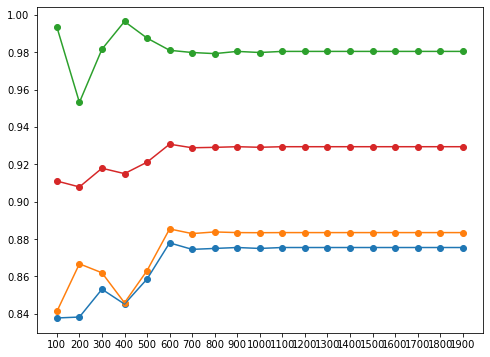

In [6]:
# Plot the 4 performance metrices wrt number of iterations
plt.figure(figsize=(8,6))
xVals = np.arange(100,2000,100)
plt.scatter(xVals, accList, label='Accuracy')
plt.scatter(xVals, precList, label='Precision')
plt.scatter(xVals, recList, label='Recall')
plt.scatter(xVals, f1List, label='F1 score')
plt.plot(xVals, accList)
plt.plot(xVals, precList)
plt.plot(xVals, recList)
plt.plot(xVals, f1List)
plt.xticks(xVals)

In [7]:
# Save the data file if needed
acc = np.column_stack((xVals, accList, precList, recList, f1List))
np.savetxt("Results/egg_all.txt", acc)